In [1]:
import numpy as np
import effector

In [2]:
np.random.seed(21)

In [3]:
X_test = np.random.uniform(-1, 1, (1000, 2))
axis_limits = np.array([[-1, -1], [1, 1]])

In [4]:
def predict(x):
    y = np.zeros(x.shape[0])
    ind = x[:, 1] > 0
    y[ind] = 10*x[ind, 0]
    y[~ind] = -10*x[~ind, 0]
    return y + np.random.normal(0, 1, x.shape[0])*.3

In [5]:
def jacobian(x):
    J = np.zeros((x.shape[0], 2))
    ind = x[:, 1] > 0
    J[ind, 0] = 10
    J[~ind, 0] = -10
    return J

In [6]:
y_limits = [-15, 15]
dy_limits = [-25, 25]

## Global Effect

### PDP

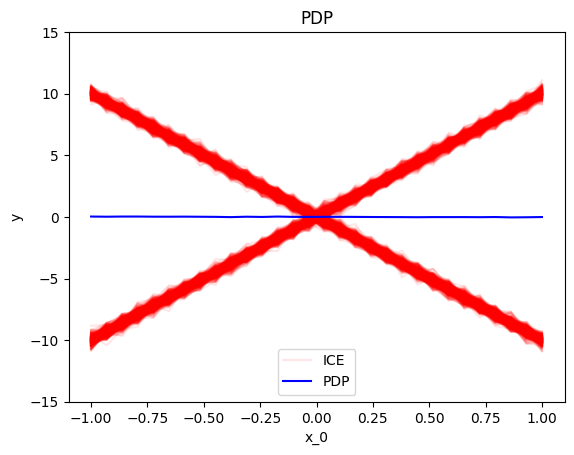

In [7]:
effector.PDP(X_test, predict, axis_limits=axis_limits).plot(feature=0, y_limits=y_limits)

### d-PDP

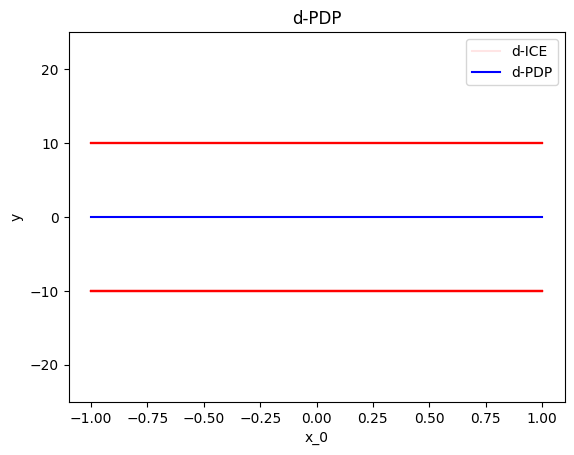

In [8]:
effector.DerPDP(X_test, predict, model_jac=jacobian, axis_limits=axis_limits).plot(feature=0, dy_limits=dy_limits)

### RHALE

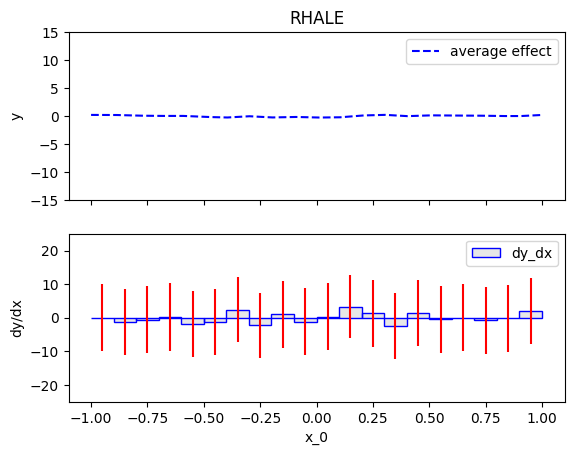

In [9]:
effector.RHALE(X_test, predict, jacobian, axis_limits=axis_limits).plot(feature=0, y_limits=y_limits, dy_limits=dy_limits)

### ALE

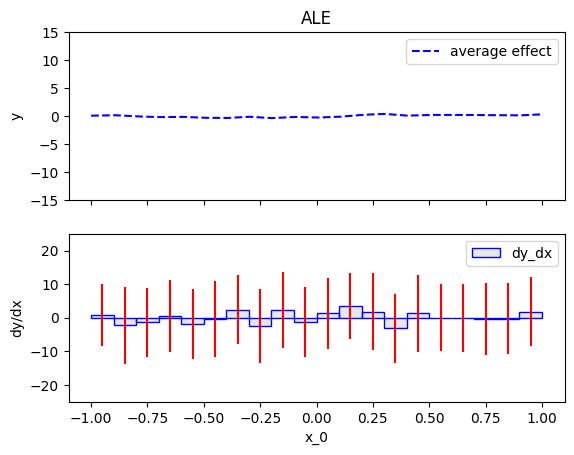

In [10]:
ale = effector.ALE(X_test, predict, axis_limits=axis_limits).plot(feature=0, y_limits=y_limits, dy_limits=dy_limits)

### SHAP-DP

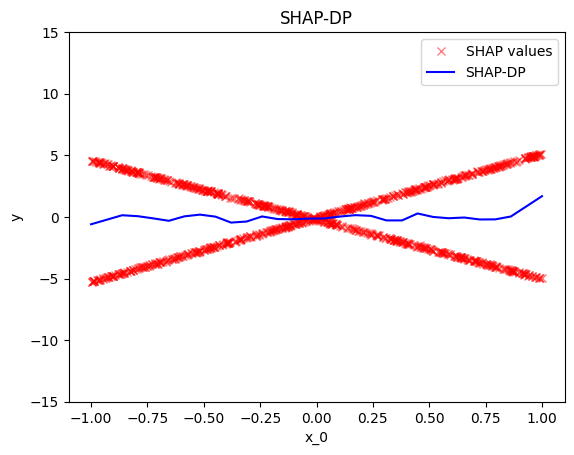

In [11]:
effector.ShapDP(X_test, predict, axis_limits=axis_limits, nof_instances="all").plot(feature=0, y_limits=y_limits)

## Regional Effect

### RegionalPDP

In [12]:
effector.RegionalPDP(X_test, predict, axis_limits=axis_limits).summary(features=0)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 100.18it/s]



Feature 0 - Full partition tree:
Node id: 0, name: x_0, heter: 35.72 || nof_instances:  1000 || weight: 1.00
        Node id: 1, name: x_0 | x_1 <= 0.0, heter: 0.09 || nof_instances:  1000 || weight: 1.00
        Node id: 2, name: x_0 | x_1  > 0.0, heter: 0.09 || nof_instances:  1000 || weight: 1.00
--------------------------------------------------
Feature 0 - Statistics per tree level:
Level 0, heter: 35.72
        Level 1, heter: 0.18 || heter drop : 35.54 (units), 99.50% (pcg)




100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 73.98it/s]


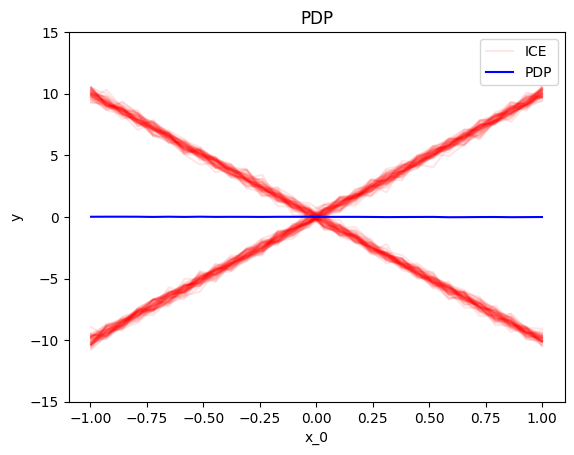

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 120.46it/s]


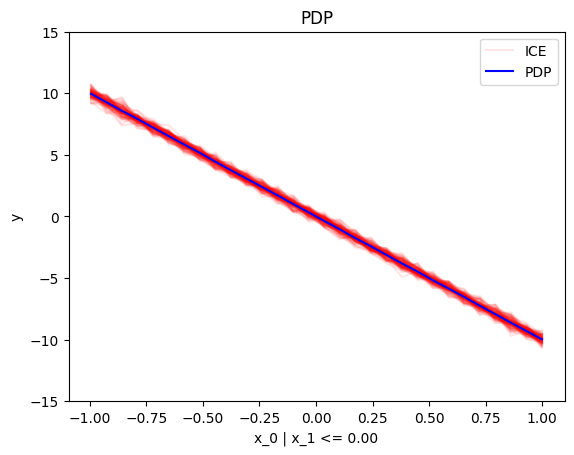

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 125.62it/s]


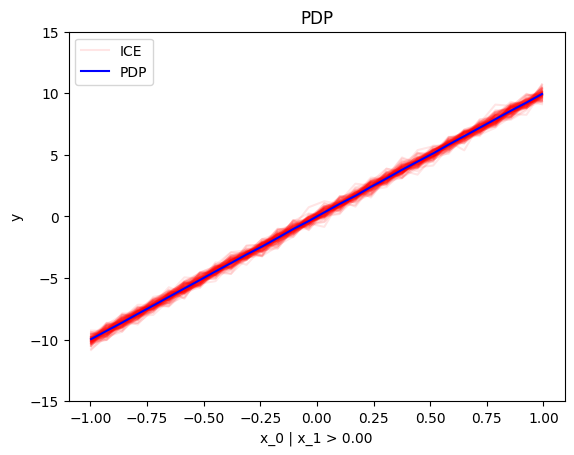

[None, None, None]

In [13]:
[effector.RegionalPDP(X_test, predict, axis_limits=axis_limits).plot(feature=0, node_idx=i, y_limits=y_limits) for i in range(0, 3)]

### RegionalDerPDP

In [14]:
effector.RegionalDerPDP(X_test, predict, jacobian, axis_limits=axis_limits).summary(features=0)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 102.22it/s]



Feature 0 - Full partition tree:
Node id: 0, name: x_0, heter: 100.00 || nof_instances:  1000 || weight: 1.00
        Node id: 1, name: x_0 | x_1 <= 0.0, heter: 0.00 || nof_instances:  1000 || weight: 1.00
        Node id: 2, name: x_0 | x_1  > 0.0, heter: 0.00 || nof_instances:  1000 || weight: 1.00
--------------------------------------------------
Feature 0 - Statistics per tree level:
Level 0, heter: 100.00
        Level 1, heter: 0.00 || heter drop : 100.00 (units), 100.00% (pcg)




100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 94.70it/s]


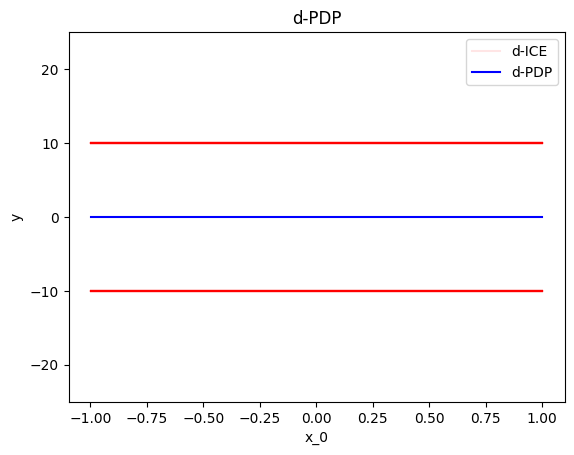

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 122.47it/s]


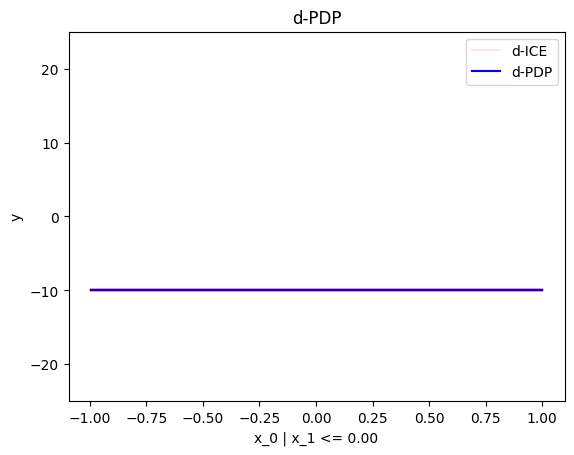

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 135.65it/s]


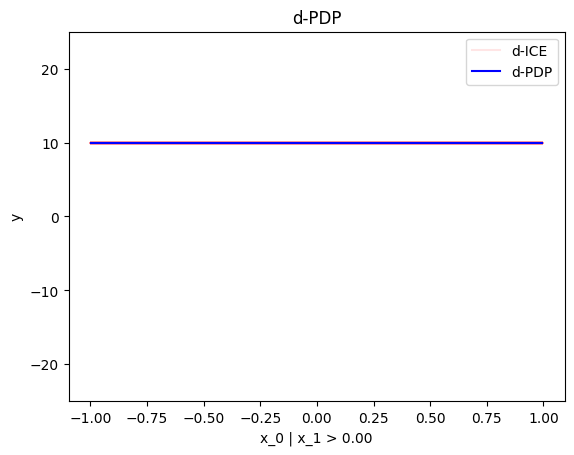

[None, None, None]

In [15]:
[effector.RegionalDerPDP(X_test, predict, jacobian, axis_limits=axis_limits).plot(feature=0, node_idx=i, dy_limits=dy_limits) for i in range(3)]

### Regional RHALE

In [16]:
effector.RegionalRHALE(X_test, predict, jacobian, axis_limits=axis_limits).summary(features=0)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.97it/s]



Feature 0 - Full partition tree:
Node id: 0, name: x_0, heter: 97.38 || nof_instances:  1000 || weight: 1.00
        Node id: 1, name: x_0 | x_1 <= 0.0, heter: 0.00 || nof_instances:  1000 || weight: 1.00
        Node id: 2, name: x_0 | x_1  > 0.0, heter: 0.00 || nof_instances:  1000 || weight: 1.00
--------------------------------------------------
Feature 0 - Statistics per tree level:
Level 0, heter: 97.38
        Level 1, heter: 0.00 || heter drop : 97.38 (units), 100.00% (pcg)




100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.47it/s]


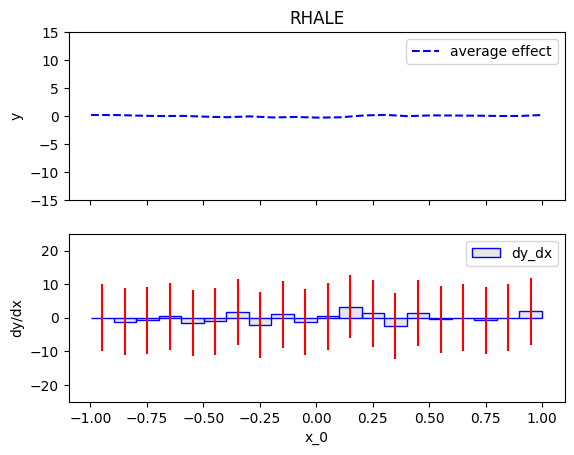

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.79it/s]


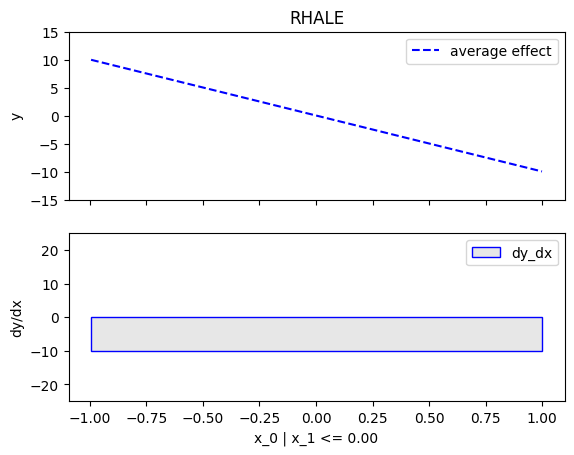

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.06it/s]


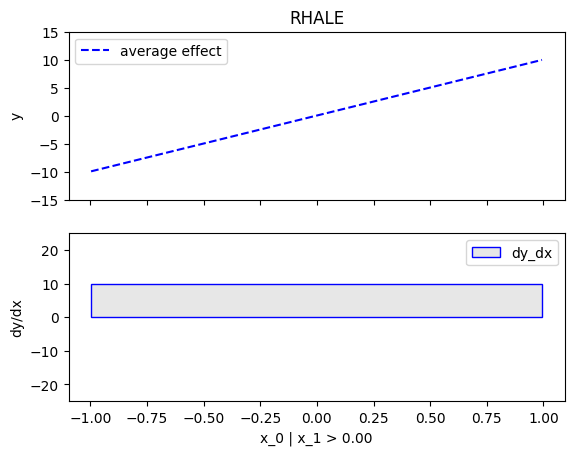

[None, None, None]

In [17]:
[effector.RegionalRHALE(X_test, predict, jacobian, axis_limits=axis_limits).plot(feature=0, node_idx=i, y_limits=y_limits, dy_limits=dy_limits) for i in range(3)]

### RegionalALE

In [18]:
effector.RegionalALE(X_test, predict, axis_limits=axis_limits).summary(features=0)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 65.11it/s]



Feature 0 - Full partition tree:
Node id: 0, name: x_0, heter: 115.53 || nof_instances:  1000 || weight: 1.00
        Node id: 1, name: x_0 | x_1 <= 0.0, heter: 18.30 || nof_instances:  1000 || weight: 1.00
        Node id: 2, name: x_0 | x_1  > 0.0, heter: 18.43 || nof_instances:  1000 || weight: 1.00
--------------------------------------------------
Feature 0 - Statistics per tree level:
Level 0, heter: 115.53
        Level 1, heter: 36.73 || heter drop : 78.80 (units), 68.21% (pcg)




100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 82.13it/s]


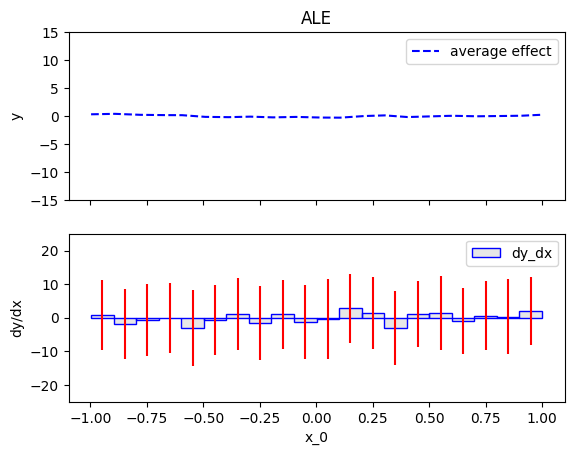

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 94.82it/s]


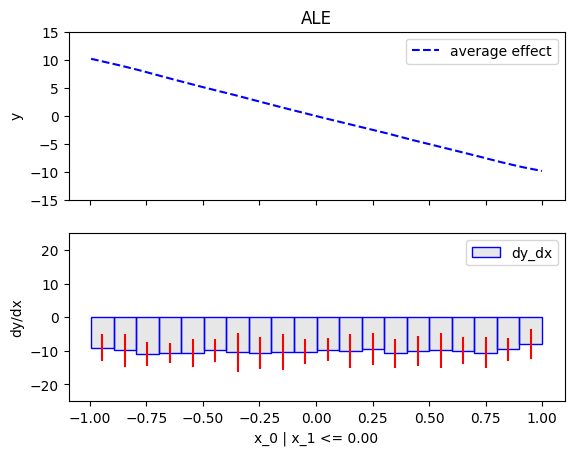

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 87.94it/s]


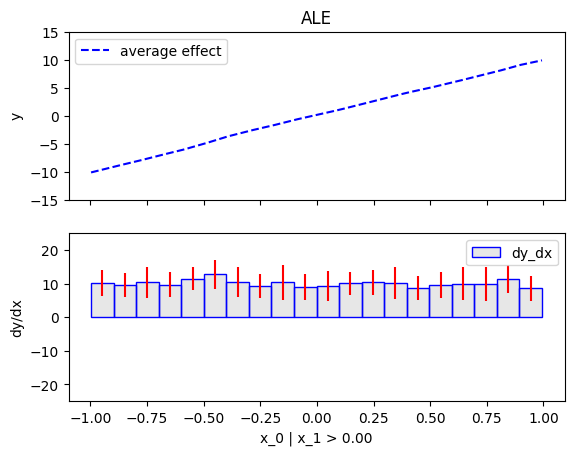

[None, None, None]

In [19]:
[effector.RegionalALE(X_test, predict, axis_limits=axis_limits).plot(feature=0, node_idx=i, y_limits=y_limits, dy_limits=dy_limits) for i in range(3)]

### RegionalShapDP

In [20]:
effector.RegionalShapDP(X_test, predict, axis_limits=axis_limits, nof_instances="all").summary(features=0)

  0%|                                                                                                                                                                                 | 0/1 [00:00<?, ?it/s]/home/givasile/miniconda3/envs/effector-dev/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:4008: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/givasile/miniconda3/envs/effector-dev/lib/python3.10/site-packages/numpy/_core/_methods.py:175: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/givasile/miniconda3/envs/effector-dev/lib/python3.10/site-packages/numpy/_core/_methods.py:210: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████



Feature 0 - Full partition tree:
Node id: 0, name: x_0, heter: 8.82 || nof_instances:  1000 || weight: 1.00
        Node id: 1, name: x_0 | x_1 <= 0.0, heter: 0.02 || nof_instances:  1000 || weight: 1.00
        Node id: 2, name: x_0 | x_1  > 0.0, heter: 0.02 || nof_instances:  1000 || weight: 1.00
--------------------------------------------------
Feature 0 - Statistics per tree level:
Level 0, heter: 8.82
        Level 1, heter: 0.04 || heter drop : 8.78 (units), 99.52% (pcg)




100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.97it/s]


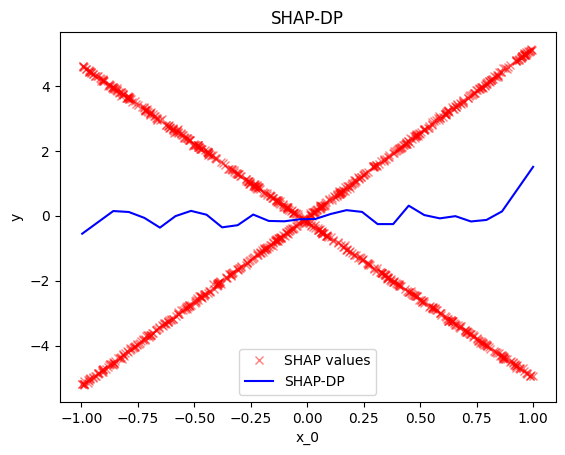

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.03it/s]


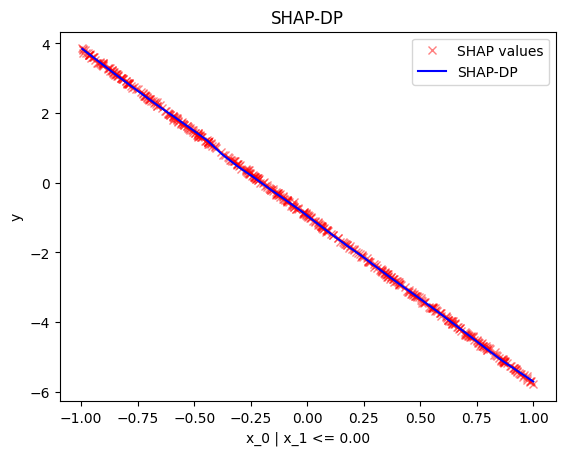

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.01it/s]


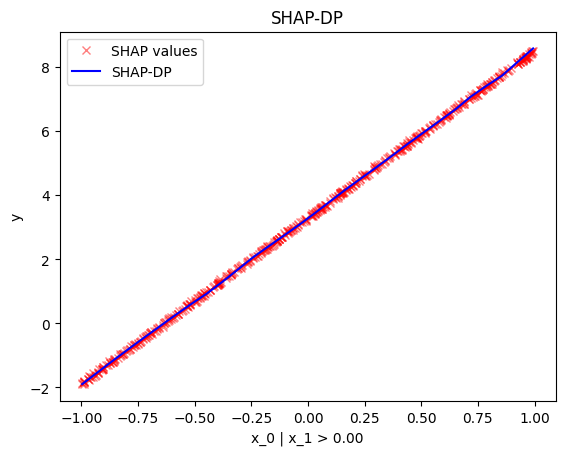

[None, None, None]

In [21]:
[effector.RegionalShapDP(X_test, predict, axis_limits=axis_limits, nof_instances="all").plot(feature=0, node_idx=i) for i in range(3)]